In [2]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

from scipy.signal import find_peaks

import matplotlib
from pylab import rcParams
#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})

def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, error_bad_lines=False, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

# 90m

In [3]:
df_1 = pd.DataFrame(columns=["15m", "30m", "45m", "90m"], index=["BER(%)"])
BER = [0.007879310344827585, 0.017435344827586206, 0.022, 0.04579310344827586]
df_1.iloc[0,:] = [round(i, 4) for i in BER]
df_1

,15m,30m,45m,90m
BER(%),0.0079,0.0174,0.022,0.0458


# 150m

In [4]:
d =[15,45,75,105]
df_2 = pd.DataFrame(columns=d, index=[0,1])
BER = [0.004185344827586207, 0.009870689655172413, 0.02841810344827586, 0.05823706896551724]
df_2.iloc[0,:] = [round(i, 4) for i in BER]
BER = [0.003288793103448276, 0.0067629310344827585, 0.03573706896551724, 0.04407758620689655]
df_2.iloc[1,:] = [round(i, 4) for i in BER]
df_2

,15,45,75,105
0,0.0042,0.0099,0.0284,0.0582
1,0.0033,0.0068,0.0357,0.0441


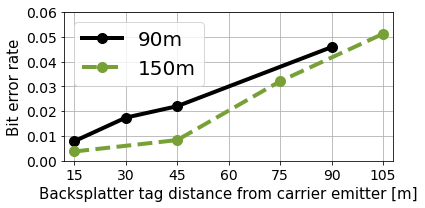

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 3
fig, ax1 = plt.subplots(1)

ax1.plot([15, 30, 45, 90], df_1.iloc[0,:], color='black', marker='o', markersize=10, linewidth=4, label='90m')
ax1.plot(d, df_2.mean(), color='#77A136', marker='o', markersize=10, linewidth=4, linestyle='--', label='150m')
ax1.set_xlabel('Backsplatter tag distance from carrier emitter [m]', fontsize=15)
ax1.set_ylabel('Bit error rate', fontsize=15)
ax1.tick_params(labelsize=14)

tmp = [0,1,2,3,4,5,6]
tmp = [i/100 for i in tmp]
ax1.set_yticks(tmp)
ax1.set_xticks(range(15,120,15))
ax1.set_xlim([12,108])
ax1.grid()

plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig('./outdoor.pdf')

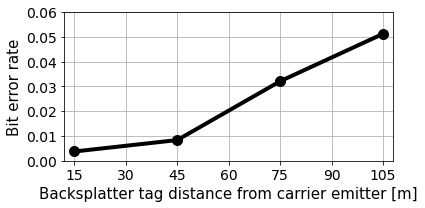

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 3
fig, ax1 = plt.subplots(1)

ax1.plot(d, df.mean(), color='black', marker='o', markersize=10, linewidth=4)
ax1.set_xlabel('Backsplatter tag distance from carrier emitter [m]', fontsize=15)
ax1.set_ylabel('Bit error rate', fontsize=15)
ax1.tick_params(labelsize=14)

tmp = [0,1,2,3,4,5,6]
tmp = [i/100 for i in tmp]
ax1.set_yticks(tmp)
ax1.set_xticks(range(15,120,15))
ax1.set_xlim([12,108])
ax1.grid()

plt.tight_layout()
plt.savefig('./outdoor_150m.pdf')